<a href="https://colab.research.google.com/github/jamelof23/Quantimxx/blob/main/basis_encoding_Ass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classical Data Encoding using Basis Encoding

## Objective
We demonstrate how to encode classical bit strings into a quantum state vector,
normalize the state, convert it into a quantum circuit, and transpile the circuit into a gate set consisting of u1, u2, u3, and CNOT gates.


## Basis Encoding Explanation
This method follows **basis encoding** because each classical bit string is mapped directly to a computational basis state in the quantum state vector, see the [glossary](https://pennylane.ai/qml/glossary/quantum_embedding) for details.

### Why is this Basis Encoding?
- In **basis encoding**, classical bit strings are represented as computational basis states of the quantum system.
- Each bit string corresponds to an index in the quantum state vector, with a coefficient (amplitude) assigned to it.
- The final quantum state is a superposition of these basis states.

### Breakdown of Encoding in This Lab:
1. **Bit String to Index Mapping:**
   - Example: "000" → Basis state |000⟩ (index 0 in the state vector).
   - Example: "001" → Basis state |001⟩ (index 1 in the state vector).
   - Example: "010" → Basis state |010⟩ (index 2 in the state vector).
   - Example: "011" → Basis state |011⟩ (index 3 in the state vector).
   - Example: "100" → Basis state |100⟩ (index 4 in the state vector).
   - Example: "101" → Basis state |101⟩ (index 5 in the state vector).
   - Example: "110" → Basis state |110⟩ (index 6 in the state vector).
   - Example: "111" → Basis state |111⟩ (index 7 in the state vector).
   

2. **Constructing the State Vector:**
   - The state vector is initialized to all zeros.
   - The elements corresponding to the chosen bit strings are set to 1.
   - The state is **normalized** to ensure it remains a valid quantum state.

3. **Final Quantum State:**
   - The system is now in a **superposition** of the selected basis states.


## Setup

In [ ]:
! pip install -q qiskit==1.3.1 pylatexenc

## Step 1: Define the Bit Strings and Encode into State Vector

### Mapping Bit Strings to the State Vector


In this example, we select the bit strings "000", "111", and "001" and set their corresponding state vector elements to 1. Afterward, we normalize the state vector to ensure it represents a valid quantum state.

In [ ]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit.visualization import array_to_latex

# --- Step 1: Define the Bit Strings and Encode into State Vector ---
# We consider the bit strings: "000", "111", and "001"
# Each corresponds to the respective index in a 3-qubit state vector.

num_qubits = 3
num_states = 3  # The number of basis states we are encoding

# Initialize a state vector with zero amplitudes
# Technically, `dtype` shoule be `complex`, but all imaginary components = 0
state_vector = np.zeros(2**num_qubits, dtype=float)

# Define the bitstrings and their corresponding indices in the state vector
bitstrings = ["000", "111", "001"]
indices = [int(b, 2) for b in bitstrings]  # Convert binary strings to decimal indices

# Set the corresponding elements in the state vector to 1
for idx in indices:
    state_vector[idx] = 1

# Display the non-normalized state vector
print("Non-normalized State Vector:")
print(state_vector)


# Normalize the state vector
state_vector /= np.linalg.norm(state_vector)

# Display the normalized state vector
print("\nNormalized State Vector:")
array_to_latex(state_vector)


Non-normalized State Vector:
[1. 1. 0. 0. 0. 0. 0. 1.]

Normalized State Vector:


<IPython.core.display.Latex object>

## Step 2: Convert the State Vector into a Quantum Circuit

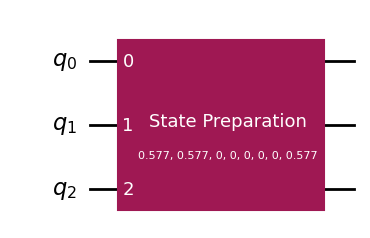

In [ ]:
qc = QuantumCircuit(num_qubits)
initial_state = Statevector(state_vector)
qc.prepare_state(initial_state, [0, 1, 2])


# visualize the Circuit
qc.draw(output='mpl')




##  Step 3: Transpile the Circuit into rx, ry, rz, and CNOT Gates
This process is typically exponentially complex because it involves decomposing arbitrary quantum operations into a limited set of elementary gates. For comparison of algorithms used to perform the conversion, please see [this](https://arxiv.org/abs/2407.15745) paper.

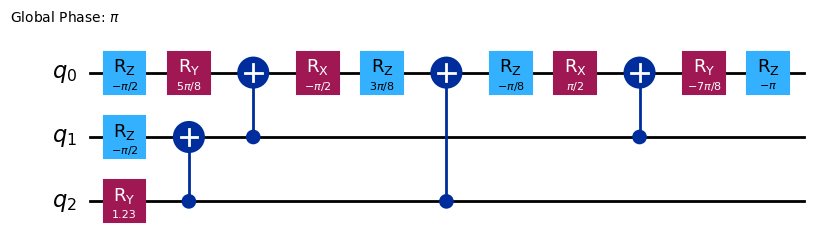

In [ ]:
transpiled_circuit = transpile(qc, basis_gates=['rx', 'ry', 'rz', 'cx'])

# Display the transpiled circuit
transpiled_circuit.draw(output='mpl')
